# Problem Description
## In this practical exercise, we will work on predicting student performance using the Student Performance dataset. The dataset contains information about students'demographics, family background, and academic performance. Your task is to build an MLP model using PyTorch to predict students' performance accurately.

# Dataset Description
## The Student Performance dataset contains the following columns:
## ● school
## ● sex
## ● age
## ● address
## ● famsize
## ● Pstatus
## ● Medu
## ● Fedu
## ● Mjob
## ● Fjob
## ● reason
## ● guardian
## ● traveltime
## ● studytime
## ● failures
## ● schoolsup
## ● famsup
## ● paid
## ● activities
## ● nursery
## ● higher
## ● internet
## ● romantic
## ● famrel
## ● freetime
## ● goout
## ● Dalc
## ● Walc
## ● health
## ● absences
## ● G1 (First period grade)
## ● G2 (Second period grade)
## ● G3 (Final grade)

# Imports

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import torch 
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim
from tqdm.notebook import tqdm 

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student_data.csv


In [249]:
data = pd.read_csv('/kaggle/input/student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [250]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [251]:
data['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

In [252]:
data['reason'].value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

In [253]:
data['guardian'].value_counts()

guardian
mother    273
father     90
other      32
Name: count, dtype: int64

In [254]:
data['nursery'].value_counts()

nursery
yes    314
no      81
Name: count, dtype: int64

In [255]:
data['Dalc'].value_counts()

Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64

In [256]:
data['Walc'].value_counts()

Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64

In [257]:
data.shape

(395, 33)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [259]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [260]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [261]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

In [262]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [263]:
data.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
301,GP,M,17,U,LE3,T,4,4,other,teacher,...,4,1,1,2,2,5,0,11,11,10
78,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
364,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,12,11,12
105,GP,F,15,U,GT3,A,3,3,other,health,...,4,3,3,1,1,4,10,10,11,11
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,2,4,1,4,3,22,9,9,9
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,2,8,9,10
259,GP,F,17,U,LE3,T,2,2,services,services,...,3,4,1,1,1,2,0,10,9,0
142,GP,F,15,U,GT3,T,4,4,teacher,services,...,4,2,2,1,1,5,2,9,11,11
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11


In [264]:
object_columns = data.select_dtypes(include=['object'])
for col in object_columns:
    print(col)

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


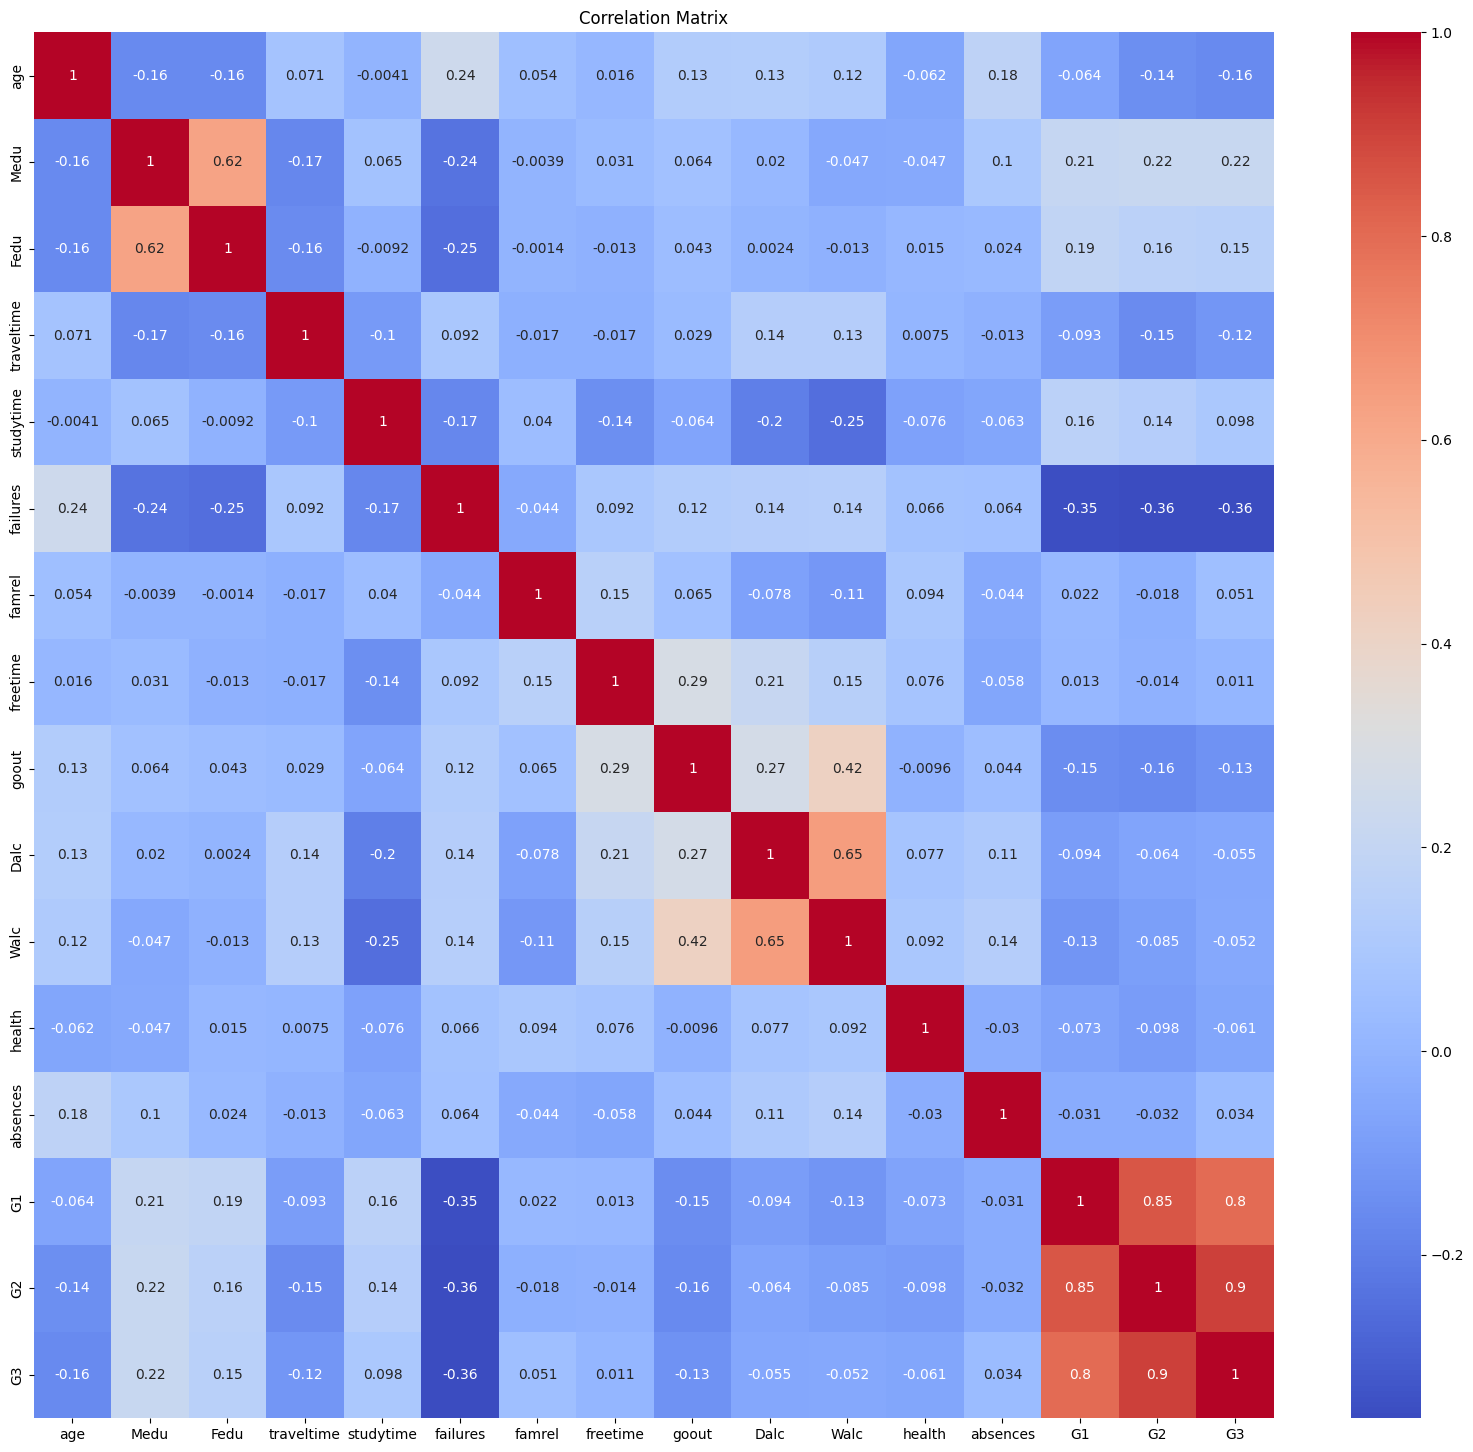

In [265]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.select_dtypes(exclude=['object', 'category']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [266]:
correlation_matrix = data.select_dtypes(exclude=['object', 'category']).corr()
print(correlation_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

In [267]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoded_data = pd.get_dummies(data, columns=categorical_columns, dtype=int, drop_first=True)

In [119]:
encoded_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [120]:
encoded_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [121]:
data = encoded_data

In [122]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G3'], axis=1), data['G3'], test_size=0.2, random_state=42)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [125]:
data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [126]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [127]:
X_train_tensor = torch.tensor(X_train_transformed, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).to(device)

In [128]:
from torch.utils.data import DataLoader, TensorDataset

In [129]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=X_test_tensor.size()[0], shuffle=False)
next(iter(train_loader))

[tensor([[-0.5864, -0.6806, -0.5055,  ...,  0.2458,  0.4387, -0.7257],
         [-1.3749, -1.6077, -0.5055,  ...,  0.2458,  0.4387, -0.7257],
         [ 0.2021,  0.2464,  0.4232,  ...,  0.2458,  0.4387, -0.7257],
         ...,
         [ 0.2021, -0.6806, -0.5055,  ...,  0.2458,  0.4387,  1.3781],
         [ 0.2021,  0.2464,  1.3519,  ...,  0.2458,  0.4387, -0.7257],
         [ 0.2021,  1.1735,  0.4232,  ...,  0.2458,  0.4387,  1.3781]]),
 tensor([10., 15., 16., 13.,  9., 14., 14., 12., 10., 11., 13., 18.,  8.,  8.,
          0.,  6., 11., 10., 11.,  6., 14.,  9., 11., 18.,  0., 14., 10., 10.,
         10.,  0.,  8., 14.,  0., 13., 16., 11., 11., 11.,  9., 12., 11.,  0.,
          0.,  9., 10., 14., 10., 15., 10., 10., 14., 13., 13., 10.,  7., 15.,
         10., 11.,  6., 12., 11.,  0., 15., 12.])]

In [130]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)


In [131]:
from sklearn.metrics import r2_score
def training(model, loss_module, optimizer, train_dl,test_loader, num_epochs, device, scheduler=None):
    train_losses = []
    test_losses = []
    train_r2s = []
    test_r2s = []
    outputs = None
    pbar = tqdm(range(num_epochs))
    for _ in pbar:
        model.train()
        avgLoss = 0
        for x, y in train_dl:
            x = x.to(device) 
            y = y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_module(outputs, y.view(-1, 1))
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            model.eval()
            train_outputs = model(X_train_tensor)
            train_loss = loss_module(train_outputs, y_train_tensor.view(-1, 1))
            train_losses.append(train_loss.item())
            train_r2 = (r2_score(y_train_tensor.view(-1, 1), train_outputs))
            train_r2s.append(train_r2.item())
            test_outputs = model(X_test_tensor)
            test_loss = loss_module(test_outputs, y_test_tensor.view(-1, 1))
            test_losses.append(test_loss.item())
            test_r2 = (r2_score(y_test_tensor.view(-1, 1), test_outputs))
            test_r2s.append(test_r2.item())
        pbar.set_description(f"Loss is : [{train_loss}]")
    return model, train_losses, train_r2s, test_losses, test_r2s

In [132]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [133]:
model = MLP(X_train.shape[1], 256, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [134]:
# 1 SGD
lr = 0.01
num_epochs = 200
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/200 [00:00<?, ?it/s]

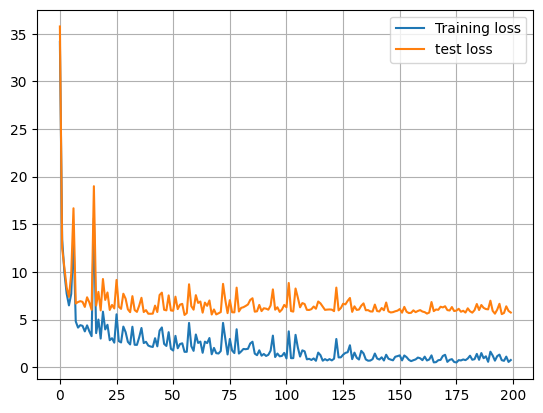

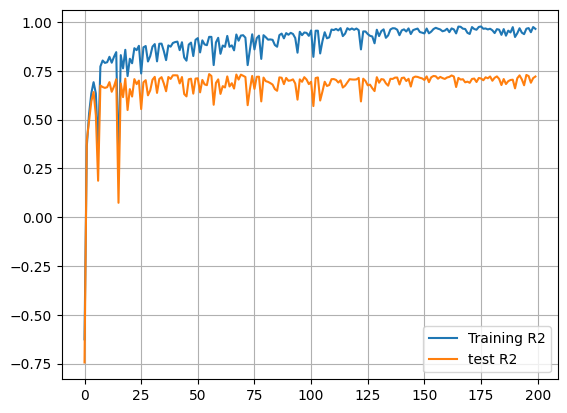

In [135]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.legend()
plt.grid(True)
plt.show()

In [136]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.ELU(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.ELU(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)


In [137]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [138]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

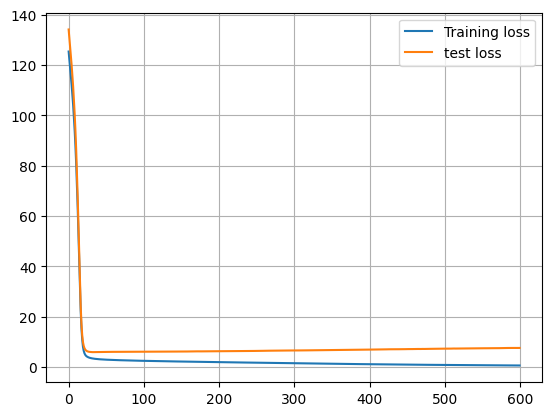

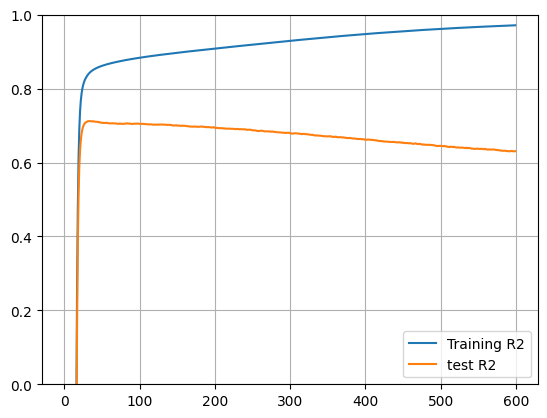

In [139]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.legend()
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

In [140]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.Softplus(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.Softplus(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)


In [141]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Softplus(beta=1, threshold=20)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Softplus(beta=1, threshold=20)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [142]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

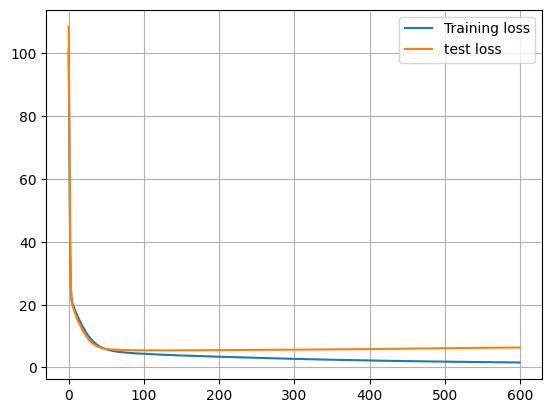

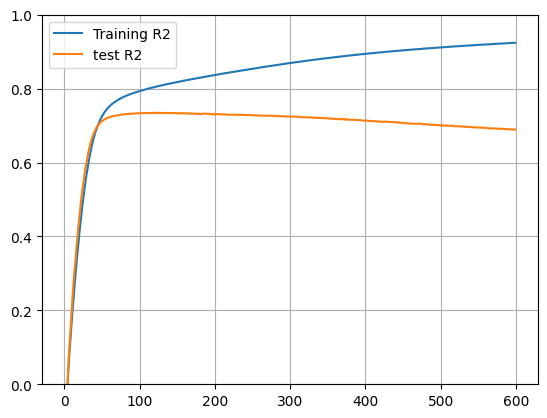

In [143]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [144]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.LeakyReLU(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.LeakyReLU(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)


In [145]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [146]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

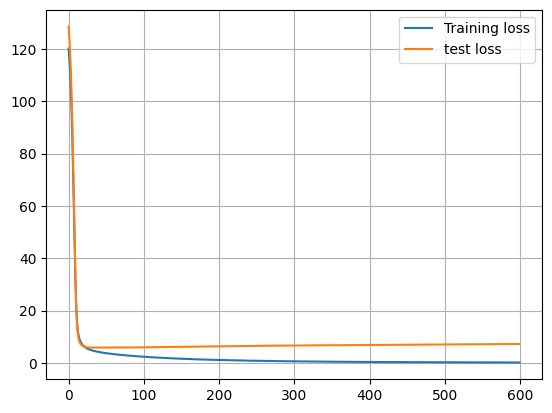

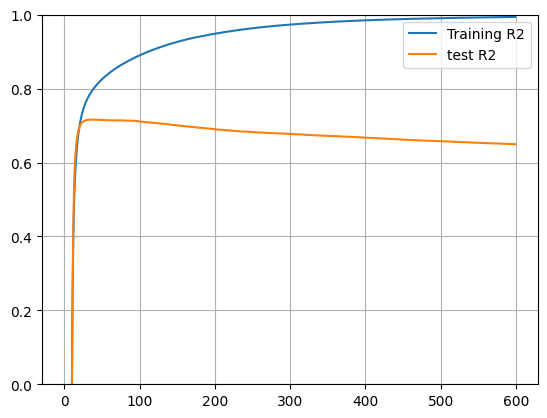

In [147]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [148]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.Tanh(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.Tanh(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)


In [149]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [150]:
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

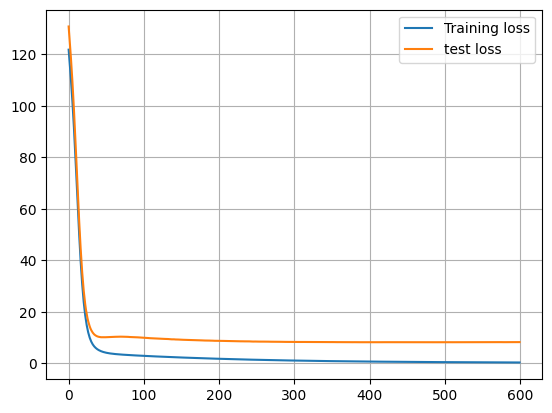

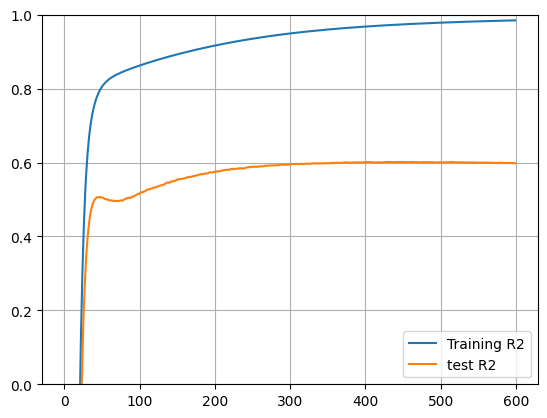

In [151]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [152]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_layer_1),
            nn.ReLU(),
            nn.Linear(hidden_layer_1, hidden_layer_2),
            nn.ReLU(),
            nn.Linear(hidden_layer_2, 1)
        )

    def forward(self, x):
        return self.model(x)


In [153]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [154]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

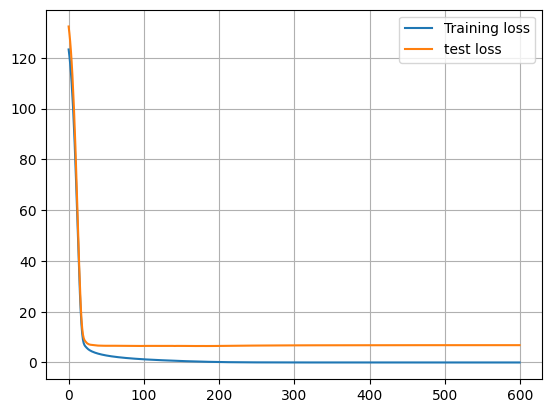

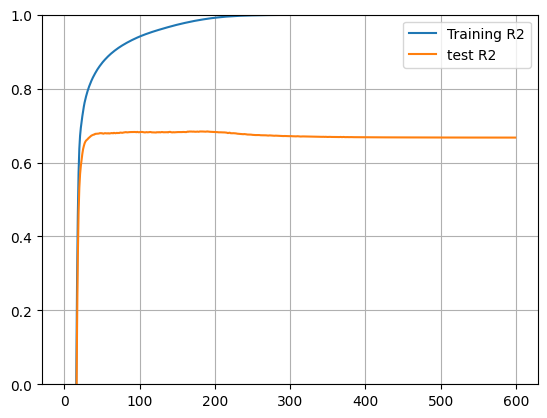

In [155]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [156]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [157]:
# 3 Adadelta
lr = 0.01
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

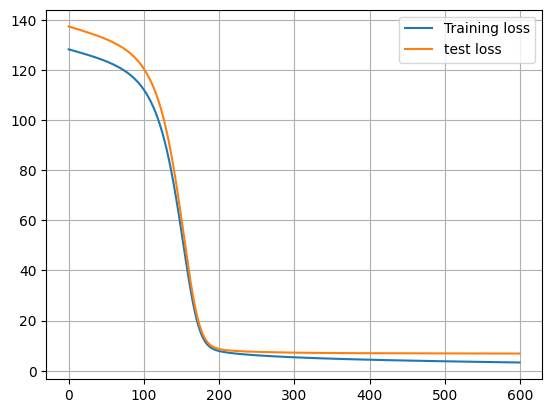

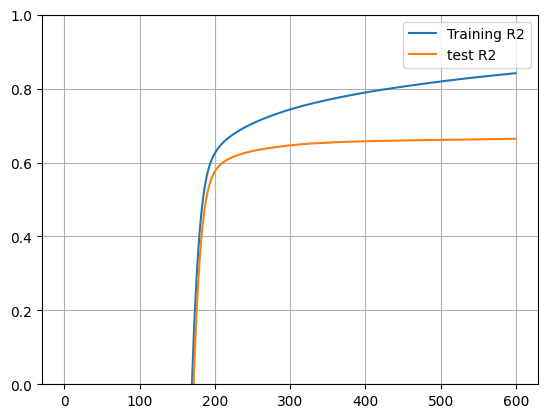

In [158]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [159]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [160]:
# 4 ASGD
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

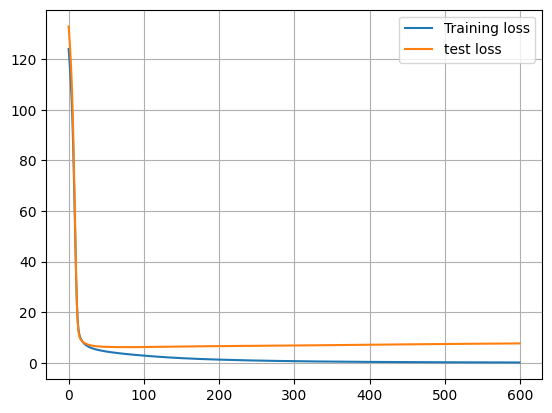

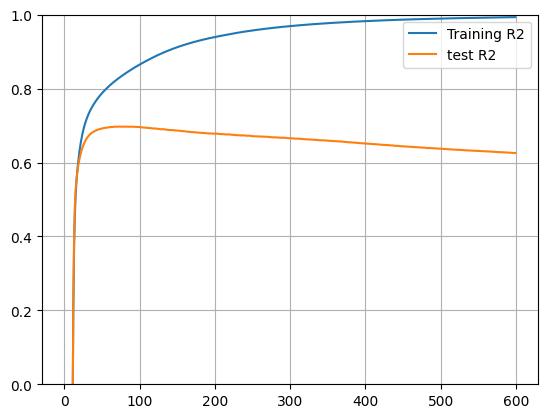

In [161]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [162]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [163]:
# 4 RMSprop
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

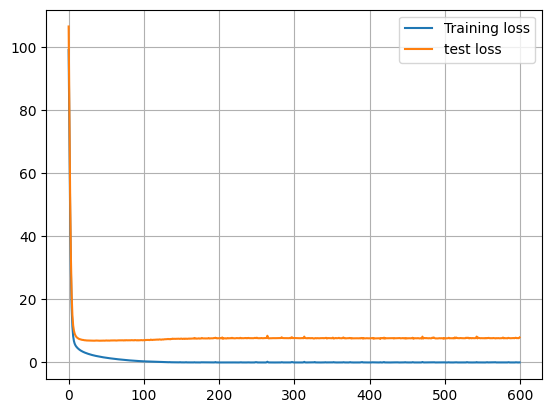

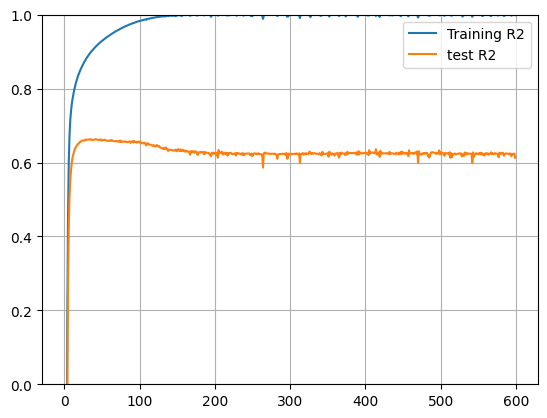

In [164]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

In [165]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [166]:
# 4 Rprop
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Rprop(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

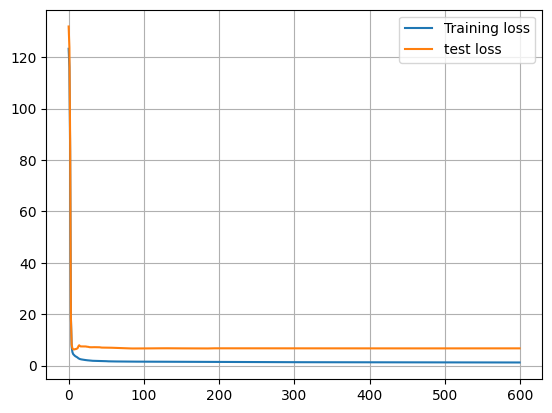

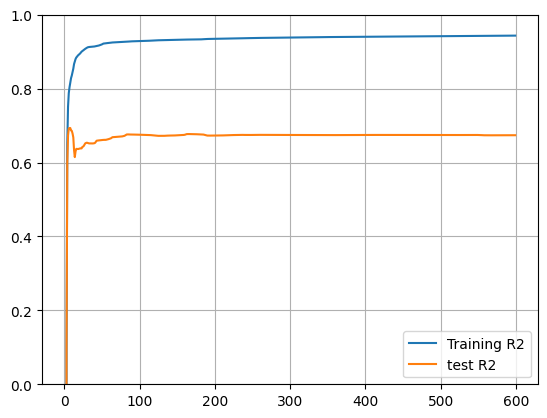

In [167]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [168]:
model = MLP(X_train.shape[1], 32, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [198]:
# 1 SGD
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

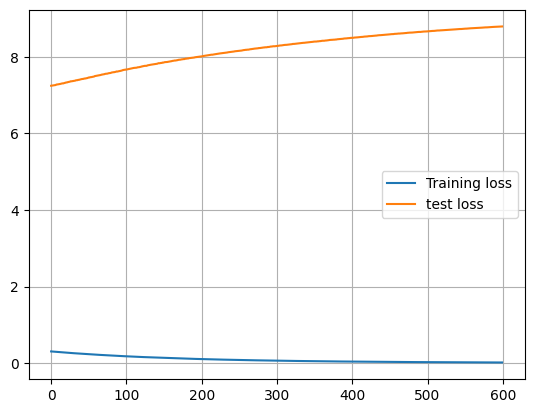

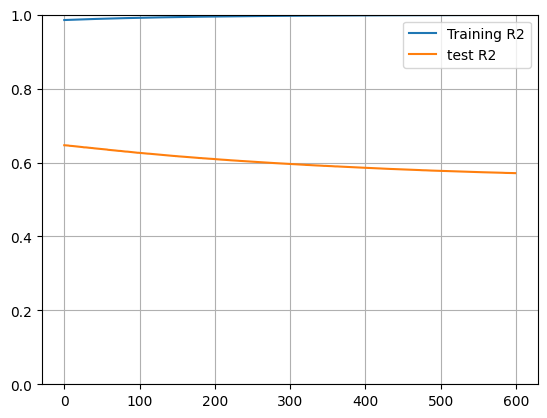

In [199]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [200]:
model = MLP(X_train.shape[1], 128, 32)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [201]:
# 1 SGD
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

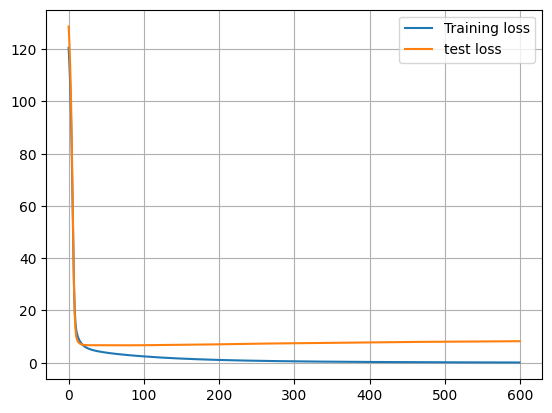

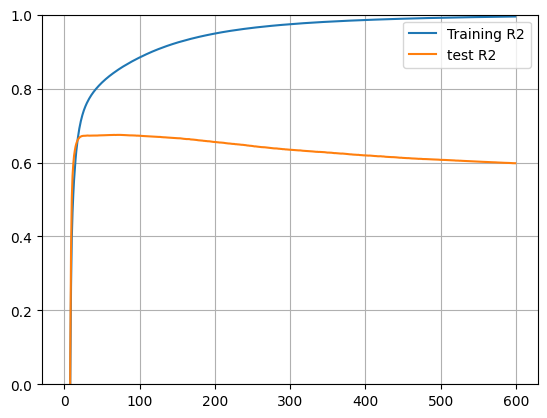

In [202]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [203]:
model = MLP(X_train.shape[1], 128, 32)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [204]:
# 1 SGD
lr = 0.005
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

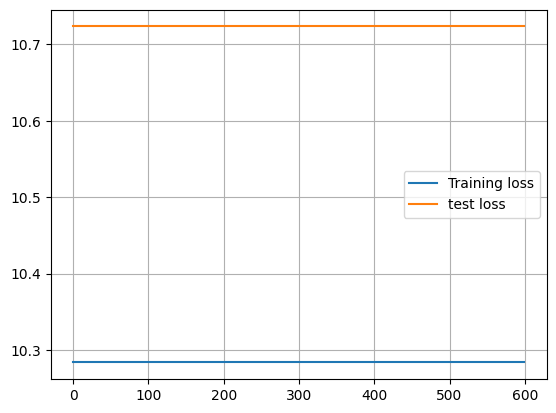

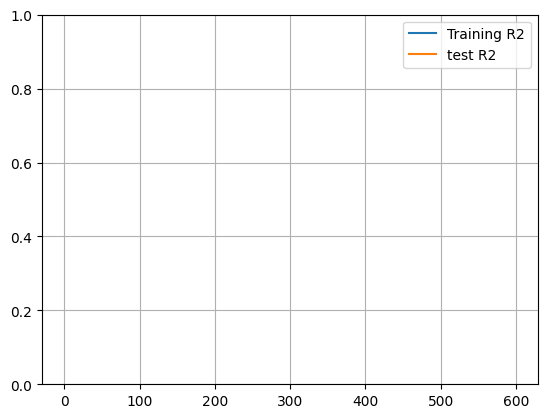

In [221]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [222]:
model = MLP(X_train.shape[1], 128, 32)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [223]:
# 1 SGD
lr = 0.0001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

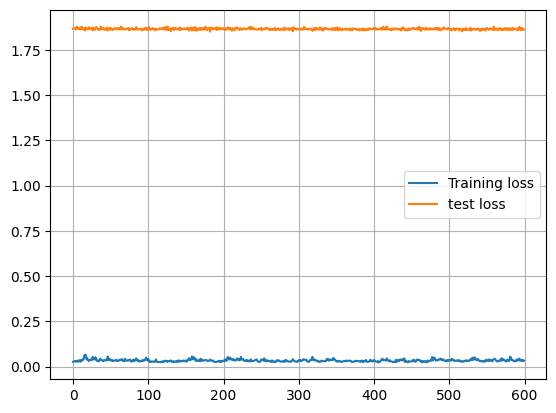

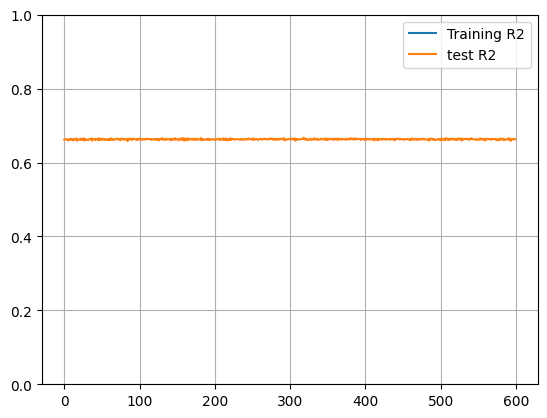

In [239]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [240]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [241]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.001)  # Add weight decay to the optimizer

  0%|          | 0/600 [00:00<?, ?it/s]

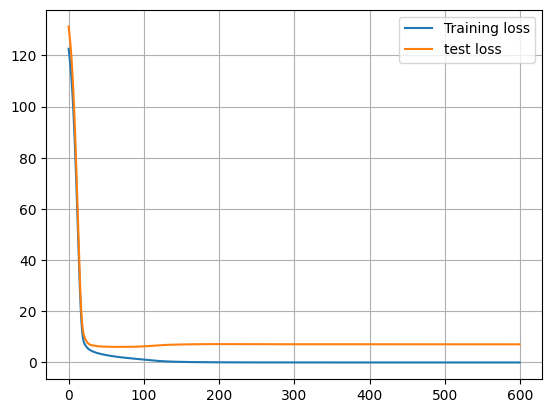

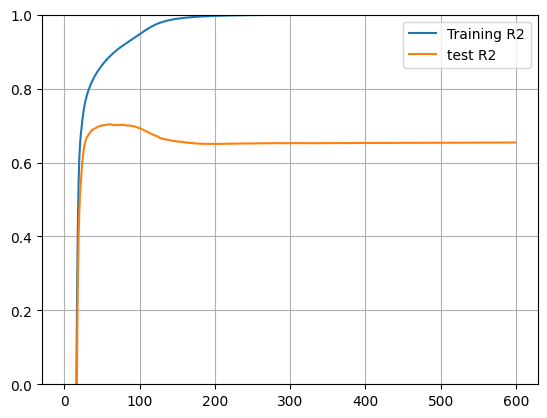

In [242]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [243]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [244]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

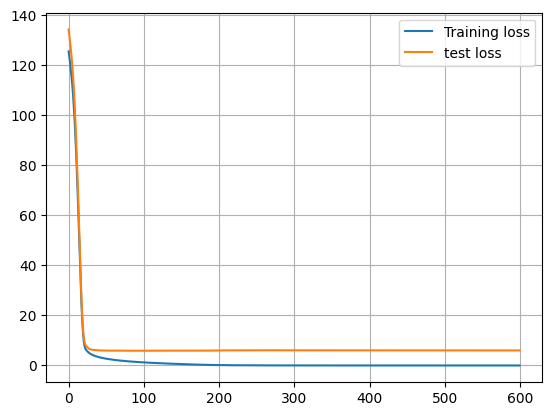

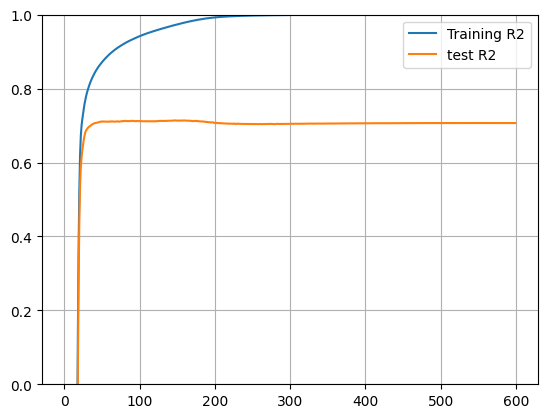

In [245]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [246]:
model = MLP(X_train.shape[1], 64, 16)
model.to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=41, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [247]:
# 2 Adam
lr = 0.001
num_epochs = 600
loss_module = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  0%|          | 0/600 [00:00<?, ?it/s]

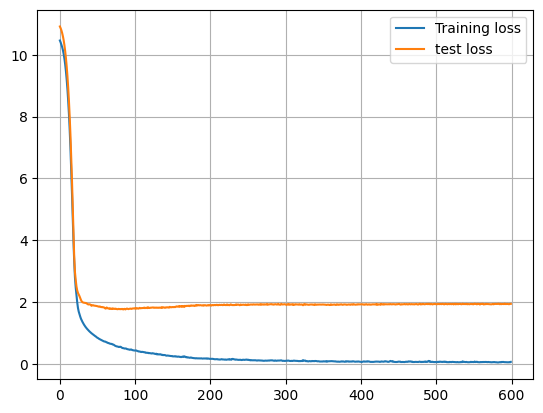

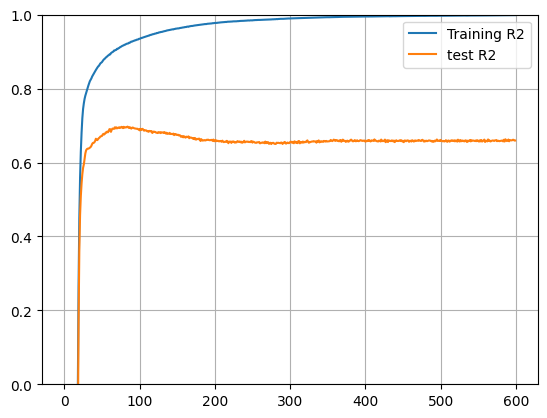

In [248]:
model, train_losses, train_r2, test_losses, test_r2 = training(model, loss_module, optimizer, train_loader, test_loader, num_epochs, 'cpu')
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_r2, label="Training R2")
plt.plot(test_r2, label="test R2")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()